<a href="https://colab.research.google.com/github/Mmona-meng/Data-Mining/blob/main/XM_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# k-Means Clustering

Do $k$-Means Clustering using a different distance metric.

In [1]:
!wget -nc https://course.ccs.neu.edu/cs6220/fall2023/homework-4/data/f150_motor_distributors.txt

import numpy as np
import matplotlib.pyplot as plt

all_data = np.loadtxt("f150_motor_distributors.txt", delimiter=",")

--2024-02-21 05:00:32--  https://course.ccs.neu.edu/cs6220/fall2023/homework-4/data/f150_motor_distributors.txt
Resolving course.ccs.neu.edu (course.ccs.neu.edu)... 129.10.117.35
Connecting to course.ccs.neu.edu (course.ccs.neu.edu)|129.10.117.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255541 (250K) [text/plain]
Saving to: ‘f150_motor_distributors.txt’

f150_motor_distribu 100%[===================>] 249.55K   753KB/s    in 0.3s    

2024-02-21 05:00:33 (753 KB/s) - ‘f150_motor_distributors.txt’ saved [255541/255541]



# 1. Simple K-means

* Calculate the distance between each data point and each centroid.

* Assign each data point to the cluster of the nearest centroid.

* Recalculate the centroids as the mean of the points in each cluster.

In [9]:
def kmeans_cluster(data,
                   centroids = np.random.randn(2,5),
                   P = np.eye(2),
                   num_iterations = 100):
  classes = np.random.choice(5, len(data))
  num_clusters = centroids.shape[0]

  # <YOUR-CODE-HERE>
  for _ in range(num_iterations):
        # Calculate distances using the distance metric defined by P
        distances = np.array([np.sum((data - centroid) @ P * (data - centroid), axis=1) for centroid in centroids])
        classes = np.argmin(distances, axis=0)

        # Update centroids
        for i in range(num_clusters):
            if np.any(classes == i):
                centroids[i] = data[classes == i].mean(axis=0)
  return centroids, classes

def plot_data(data, centroids, classes):
  # <YOUR-CODE-HERE>
  plt.figure(figsize=(10, 6))
  for i in range(centroids.shape[0]):
      plt.scatter(data[classes == i, 0], data[classes == i, 1], label=f'Cluster {i+1}')
  plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', label='Centroids')
  plt.title('K-Means Clustering')
  plt.xlabel('Dimension 1')
  plt.ylabel('Dimension 2')
  plt.legend()
  plt.show()
  # return

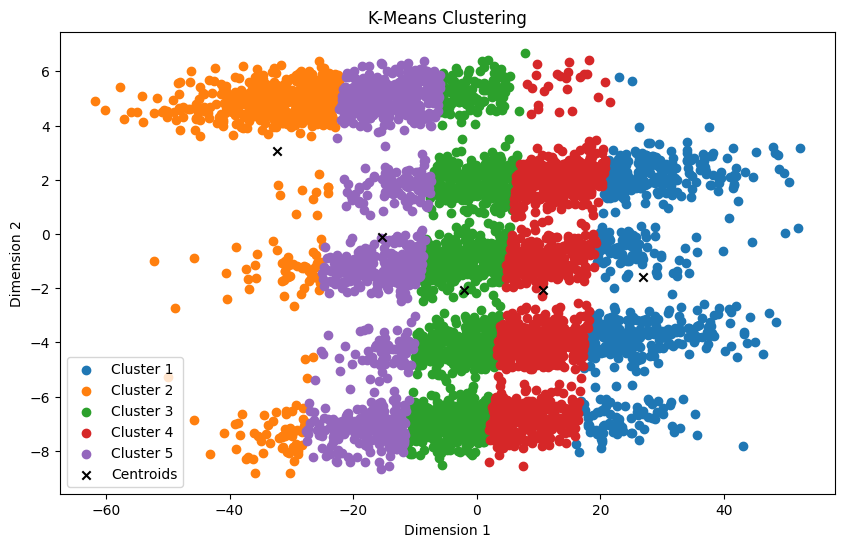

In [10]:
use_P = True #@param
centroids_ = np.array([[10.0, 10.0], [-10.0, -10.0], [2.0, 2.0], [3.0, 3.0], [-3.0, -3.0]])

if not use_P:
  P_ = np.eye(2)
else:
  P_ = np.array([[10, 0.5], [-10, 0.25]])


centroids_, classes_ = kmeans_cluster( all_data, centroids_, P = P_ )
plot_data(all_data, centroids_, classes_)


4. Why is k = 5 a logical choice for this dataset? After plotting your resulting clusters, What do you notice?

The choice of k=5 for this dataset is logical due to the data being from five different years: 1996, 1999, 2006, 2015, and 2022. This implies that the dataset potentially contains patterns unique to each of these years, suggesting a natural division into five distinct groups.

Upon plotting the resulting clusters, I observed that the data distribution is horizontally and towards a linear divided way.

# 2. With Product Information

<ipython-input-7-d21885bdd28e>:10: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.dot(np.dot(diff.T, P_inv), diff))


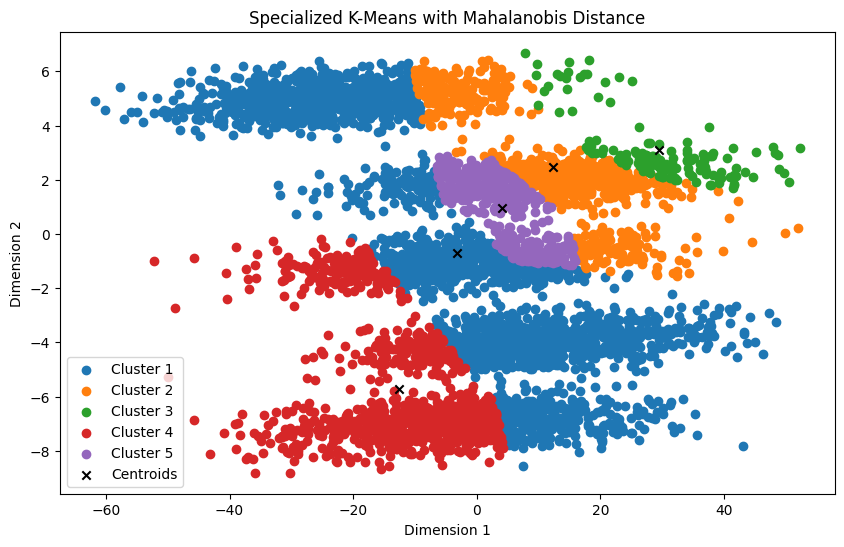

In [7]:
# Given covariance matrix P
P = np.array([[10, 0.5], [-10, 0.25]])

# Precompute the inverse of P for efficiency
P_inv = np.linalg.inv(P)

def mahalanobis_distance(x, mu, P_inv):
    """Calculate the Mahalanobis distance using the precomputed inverse of P."""
    diff = x - mu
    return np.sqrt(np.dot(np.dot(diff.T, P_inv), diff))

def specialized_kmeans(data, centroids, P_inv, max_iters=100):
    k = centroids.shape[0]
    classes = np.random.choice(k, len(data))

    for _ in range(max_iters):
        # Update classes based on Mahalanobis distance
        for i, point in enumerate(data):
            distances = [mahalanobis_distance(point, centroids[j], P_inv) for j in range(k)]
            classes[i] = np.argmin(distances)

        # Update centroids
        for j in range(k):
            cluster_points = data[classes == j]
            if len(cluster_points) > 0:
                centroids[j] = np.mean(cluster_points, axis=0)

    return centroids, classes

# Initial centroids
initial_centroids = np.random.randn(5, 2)

# Run the specialized k-means algorithm
final_centroids, cluster_assignments = specialized_kmeans(all_data, initial_centroids, P_inv)

# Plotting the results
plt.figure(figsize=(10, 6))
for i in range(initial_centroids.shape[0]):
    plt.scatter(all_data[cluster_assignments == i, 0], all_data[cluster_assignments == i, 1], label=f'Cluster {i+1}')
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], c='black', marker='x', label='Centroids')
plt.title('Specialized K-Means with Mahalanobis Distance')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

5. Implement a specialized k-means with the above Mahalanobis Distance. Scatter the results with the different clusters as different colors. What do you notice?

 I noticed that the division lines between clusters are not linear, which suggests that this distance measure takes into account the variability of the data in different directions.

 The boundaries between clusters are less perpendicular to the axes and more aligned with the natural distribution of the data points when using Mahalanobis distance.

 I can also see a rotation of the clusters' division lines in the Mahalanobis plot relative to the Euclidean plot.

# PCA

* Compute the covariance matrix of the standardized data.
* Calculate the eigenvalues and eigenvectors of the covariance matrix.
* Sort the eigenvectors by decreasing eigenvalues and choose the first one.

In [11]:
from sklearn.decomposition import PCA

# Assuming 'data' is already loaded and contains the aggregate data
# Calculate the PCA
pca = PCA(n_components=1)
pca.fit(all_data)

# Get the first principal component
first_principal_component = pca.components_[0]

print("The first principal component is:", first_principal_component)

The first principal component is: [-0.99838317  0.05684225]


In [13]:
from sklearn.preprocessing import StandardScaler

# 'cluster_assignments' is a list of cluster labels for each data point
clusters = {}
for i in range(len(cluster_assignments)):
    if cluster_assignments[i] not in clusters:
        clusters[cluster_assignments[i]] = []
    clusters[cluster_assignments[i]].append(all_data[i])

# Dictionary to hold the first principal component of each cluster
first_pcs = {}

for cluster_id, points in clusters.items():
    # Convert to numpy array and standardize the data
    cluster_data = StandardScaler().fit_transform(np.array(points))

    # Perform PCA
    pca = PCA(n_components=1)
    pca.fit(cluster_data)

    # Store the first principal component
    first_pcs[cluster_id] = pca.components_[0]

# Print the first principal component of each cluster
for cluster_id, pc in first_pcs.items():
    print(f"Cluster {cluster_id}: First principal component: {pc}")



Cluster 3: First principal component: [-0.70710678  0.70710678]
Cluster 0: First principal component: [-0.70710678  0.70710678]
Cluster 1: First principal component: [ 0.70710678 -0.70710678]
Cluster 2: First principal component: [-0.70710678  0.70710678]
Cluster 4: First principal component: [ 0.70710678 -0.70710678]
